# Import dataset 

In [14]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('rideshare_kaggle.csv')

#print the dataset
data[0:5]


PermissionError: [Errno 13] Permission denied

In [ ]:
#Check if there are any null values
missing_percentage = data.isnull().sum()
print(missing_percentage)

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

### there are some null values in price


In [ ]:
#Load prices into variable
prices = data['price']
#Print description
print(prices.describe())

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64


Text(0, 0.5, 'Occurences')

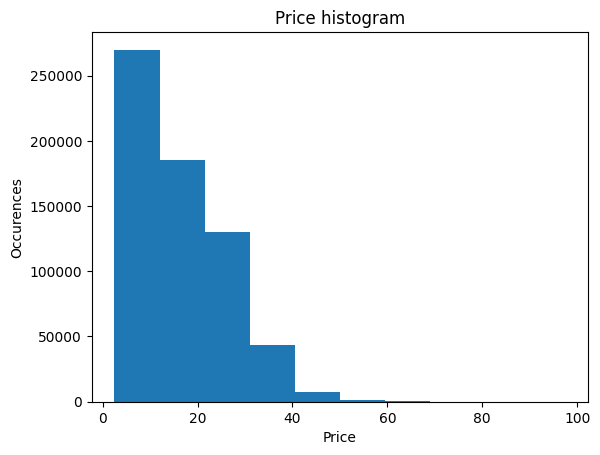

In [ ]:
import matplotlib.pyplot as plotcake

#Lets make a histogram
plotcake.hist(prices)
plotcake.title('Price histogram')
plotcake.xlabel('Price')
plotcake.ylabel('Occurences')

Scaterplot


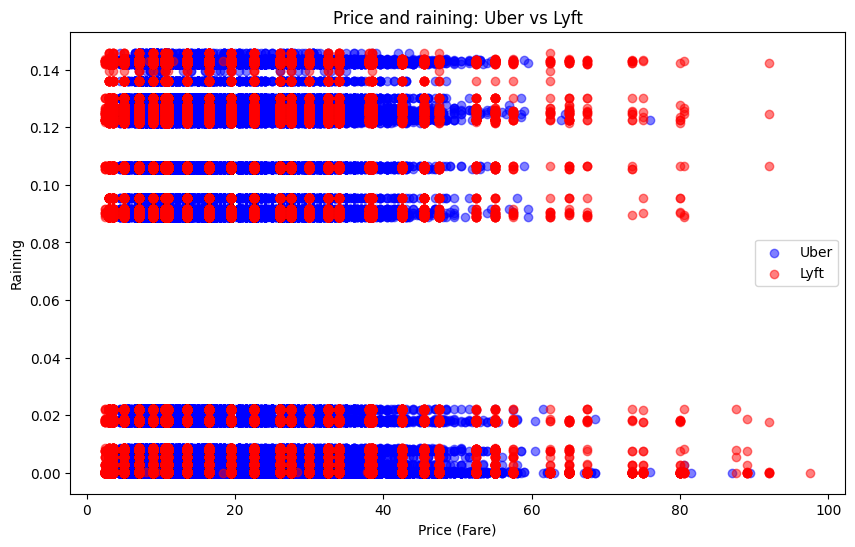

In [ ]:
uber_data = data[data['cab_type'] == 'Uber']
lyft_data = data[data['cab_type'] == 'Lyft']

# Compare price and precipIntensityMax
plt.figure(figsize=(10, 6))
plt.scatter(uber_data['price'], uber_data['precipIntensityMax'], color='blue', alpha=0.5, label='Uber')
plt.scatter(lyft_data['price'], lyft_data['precipIntensityMax'], color='red', alpha=0.5, label='Lyft')

plt.xlabel('Price (Fare)')
plt.ylabel('Raining')
plt.title('Price and raining: Uber vs Lyft')
plt.legend()
plt.show()

Apparently, rain does not afect that much....

C:\Users\ligia\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


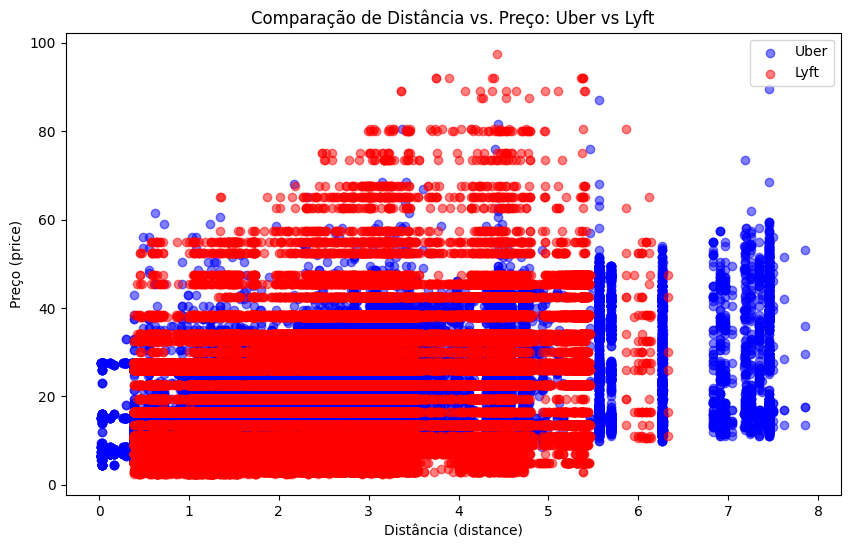

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(uber_data['distance'], uber_data['price'], color='blue', alpha=0.5, label='Uber')
plt.scatter(lyft_data['distance'], lyft_data['price'], color='red', alpha=0.5, label='Lyft')

plt.xlabel('Distância (distance)')
plt.ylabel('Preço (price)')
plt.title('Comparação de Distância vs. Preço: Uber vs Lyft')
plt.legend()
plt.show()

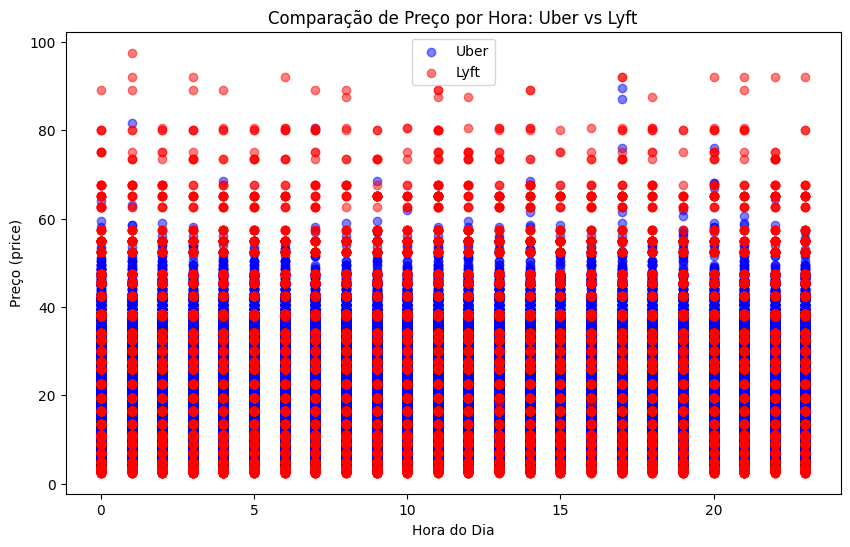

In [18]:
# Criar scatter plot para comparar hora do dia e preço
plt.figure(figsize=(10, 6))
plt.scatter(uber_data['hour'], uber_data['price'], color='blue', alpha=0.5, label='Uber')
plt.scatter(lyft_data['hour'], lyft_data['price'], color='red', alpha=0.5, label='Lyft')

plt.xlabel('Hora do Dia')
plt.ylabel('Preço (price)')
plt.title('Comparação de Preço por Hora: Uber vs Lyft')
plt.legend()
plt.show()


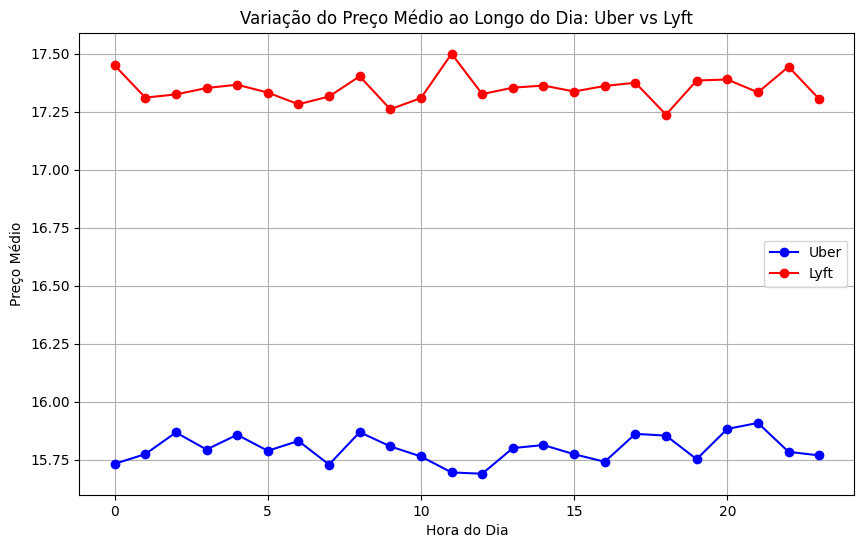

In [19]:
# Calcular média de preço por hora para cada serviço
uber_avg_price = uber_data.groupby('hour')['price'].mean()
lyft_avg_price = lyft_data.groupby('hour')['price'].mean()

# Criar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(uber_avg_price.index, uber_avg_price.values, color='blue', marker='o', label='Uber')
plt.plot(lyft_avg_price.index, lyft_avg_price.values, color='red', marker='o', label='Lyft')

plt.xlabel('Hora do Dia')
plt.ylabel('Preço Médio')
plt.title('Variação do Preço Médio ao Longo do Dia: Uber vs Lyft')
plt.legend()
plt.grid(True)
plt.show()
